In [1]:
import os
currentDirectory = os.getcwd()
currentDirectory

'C:\\Users\\Samir\\Desktop\\@ML\\Support Vector Regression'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Data Set\\Position_Salaries.csv')

In [4]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values

**Before Scaling**

In [6]:
# Fitting SVR to the dataset
X_linear = X
y_linear = y
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_linear, y_linear)

C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
# Predicting a new result
y_pred_linear = regressor.predict([[6.5]])
#y_pred = sc_y.inverse_transform(y_pred)
y_pred_linear

array([130001.55760156])

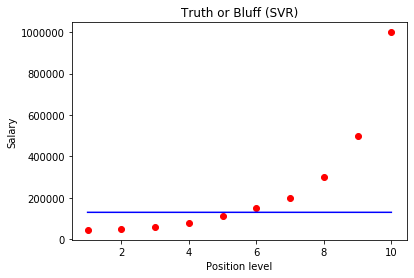

In [8]:
# Visualising the SVR results
plt.scatter(X_linear, y_linear, color = 'red')
plt.plot(X_linear, regressor.predict(X_linear), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

why blue line is a straight line ?


Because we didn't scale the data.

**After Scaling**

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [10]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [11]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [12]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [13]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\Samir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [14]:
# Predicting a new result
y_pred = regressor.predict(np.array([[6.5]]))
y_pred

array([0.01158103])

**Converting scaled data**

In [15]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))
y_pred

array([-0.27861589])

We also need to use inverse  transform to get the original scale of the salary.

In [16]:
y_pred = sc_y.inverse_transform(y_pred)
y_pred.astype(int)

array([170370])

Why we selected sc_y object on inverse transform?

Result of the code above is the prediction of the salary feature set **y**.The result is coming in Y(predicted salary).

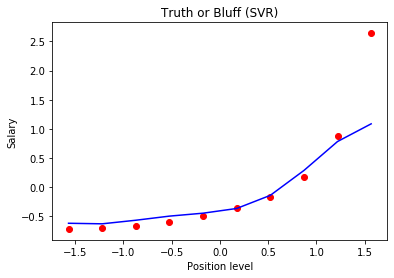

In [17]:
# Visualising the SVR results
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


Red point is the actual Salary.Projection of Red point on the Blue line is the predicted salary.

There is a exception for the last(10th point,for CEO)  because the model is not fitting for the last point is considered as **Outlier** here and the point is also quite far from the other points.The thing that is happening here is having some penalty parameters selected by default in its algorithm

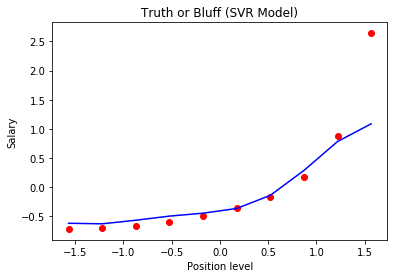

In [21]:
# Visualising the SVR results (for higher resolution and smoother Curve)
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
